In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Train.csv')
df.head()

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
0,ID_ENTGC7,1/1/19,PD01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.0
1,ID_8JCCXC,1/1/19,PD04,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.0
2,ID_V3136Z,1/1/19,RO01,45.045825,12.060869,0.000000,NaN,0.024470,0.674160,0.000024,0.000086,NaN,14437.38294,31.0
3,ID_KRVZDJ,1/1/19,RO02,45.104075,11.553241,1.200467,NaN,-0.010442,0.920054,0.000024,0.000124,NaN,14440.83831,30.0
4,ID_PR351A,1/1/19,RO03,45.038758,11.790152,1.274564,NaN,-0.176178,0.747464,0.000024,0.000116,NaN,14438.79037,58.0


In [3]:
print(f"Size of DataFrame: {df.shape}")
df = df.dropna()
print(f"Size of DataFrame after dropping rows with missing values: {df.shape}")
df = df.drop(['ID_Zindi', 'Date', 'ID'], axis=1)
print(f"Size of DataFrame after dropping non-data columns: {df.shape}")

Size of DataFrame: (86584, 14)
Size of DataFrame after dropping rows with missing values: (40927, 14)
Size of DataFrame after dropping non-data columns: (40927, 11)


In [4]:
df.head()

,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
11,45.713559,11.367657,0.0,275.18,-0.159398,0.000000,0.000024,0.000101,0.000084,14422.64906,39.000
15,45.690429,9.484261,0.0,281.48,-0.531419,0.140807,0.000023,0.000245,0.000288,14429.31480,15.925
16,45.619244,8.756970,0.0,282.98,-0.580316,0.121120,0.000023,0.000156,0.000133,14425.69705,27.775
25,45.649703,9.601223,0.0,282.66,-0.591821,0.151411,0.000023,0.000266,0.000159,14436.04415,13.875
27,45.601232,9.275073,0.0,281.06,-0.512341,0.164469,0.000023,0.000245,0.000222,14433.50968,30.425


### Correlation Analysis

In [5]:
correlation_matrix = df.corr(method='pearson')
print(correlation_matrix['GT_NO2'].sort_values(ascending=True))

# Cloud Fraction, LON, SHOULD BE IGNORED
# AAI, LAT CAN BE IGNORED

NO2_strat            -0.571280
LST                  -0.527787
Precipitation        -0.086861
LON                  -0.065589
CloudFraction         0.036754
TropopausePressure    0.084181
AAI                   0.184690
LAT                   0.207283
NO2_total             0.696369
NO2_trop              0.728916
GT_NO2                1.000000
Name: GT_NO2, dtype: float64


### MULTIVARIATE REGRESSION ANALYSIS

                            OLS Regression Results                            
Dep. Variable:                 GT_NO2   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     5682.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:02:43   Log-Likelihood:            -1.5596e+05
No. Observations:               40927   AIC:                         3.119e+05
Df Residuals:                   40916   BIC:                         3.120e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -240.0208     11

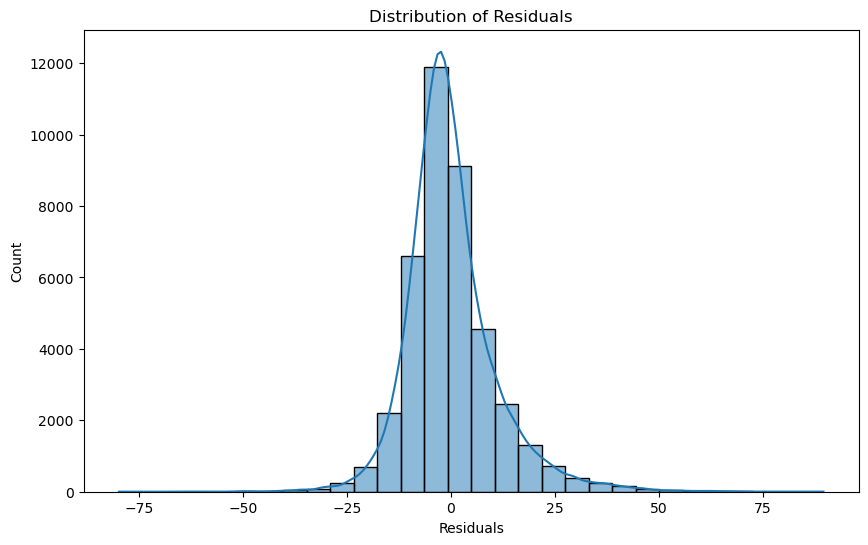

In [6]:
x = df.drop(columns=['GT_NO2'])
y = df['GT_NO2']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

# Extract residuals and fitted values
residuals = model.resid
fitted_values = model.fittedvalues

# Plot residuals vs fitted values
# plt.figure(figsize=(10, 6))
# plt.scatter(fitted_values, residuals, alpha=0.5)
# plt.axhline(0, color='red', linestyle='--', linewidth=2)
# plt.xlabel('Fitted Values')
# plt.ylabel('Residuals')
# plt.title('Residuals vs Fitted Values')
# plt.show()

# Plot residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

# Plot Q-Q plot for residuals
# sm.qqplot(residuals, line='45')
# plt.title('Q-Q Plot')
# plt.show()

                            OLS Regression Results                            
Dep. Variable:                 GT_NO2   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     3029.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:02:43   Log-Likelihood:            -1.6523e+05
No. Observations:               40927   AIC:                         3.305e+05
Df Residuals:                   40919   BIC:                         3.306e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -324.7710     13

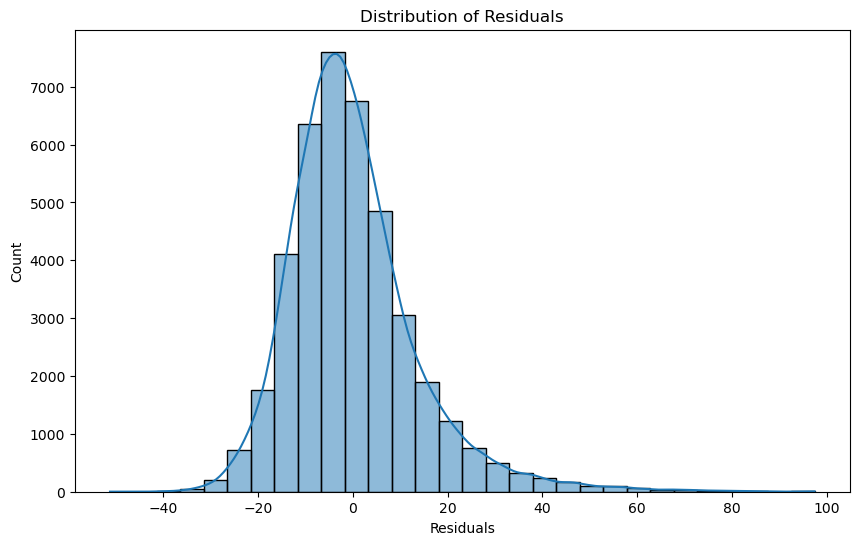

In [7]:
x = df.drop(columns=['NO2_trop', 'NO2_strat', 'NO2_total', 'GT_NO2'])
y = df['GT_NO2']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

# Extract residuals and fitted values
residuals = model.resid
fitted_values = model.fittedvalues

# Plot residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

### Random Forest 

In [32]:
x = df.drop(columns=['GT_NO2'])
y = df['GT_NO2']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# for i in tqdm(range(10,100,10)):
#     rf = RandomForestRegressor(n_estimators=i, random_state=42)
#     rf.fit(x_train, y_train)
#     feature_importances = rf.feature_importances_
#     feature_importance_df = pd.DataFrame({'feature': x.columns, 'importance': feature_importances})
#     print(feature_importance_df.sort_values(by='importance', ascending=True))

rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(x_train, y_train)
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'feature': x.columns, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df.sort_values(by='importance', ascending=False))

rf_list = feature_importance_df.values[:,0].tolist()
print(rf_list)

              feature  importance
8            NO2_trop    0.520004
1                 LON    0.087882
3                 LST    0.082607
0                 LAT    0.076419
7           NO2_total    0.062210
6           NO2_strat    0.053661
4                 AAI    0.041569
9  TropopausePressure    0.036679
5       CloudFraction    0.035636
2       Precipitation    0.003334
['NO2_trop', 'LON', 'LST', 'LAT', 'NO2_total', 'NO2_strat', 'AAI', 'TropopausePressure', 'CloudFraction', 'Precipitation']


### LASSO REGRESSION

In [34]:
x = df.drop(columns=['GT_NO2'])
y = df['GT_NO2']

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(x, y)
importance = np.abs(lasso.coef_)
feature_importance_df = pd.DataFrame({'feature': x.columns, 'importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df.sort_values(by='importance', ascending=False))

lr_list = feature_importance_df.values[:,0].tolist()
print(lr_list)

              feature  importance
3                 LST    0.853382
9  TropopausePressure    0.000616
0                 LAT    0.000000
1                 LON    0.000000
2       Precipitation    0.000000
4                 AAI    0.000000
5       CloudFraction    0.000000
6           NO2_strat    0.000000
7           NO2_total    0.000000
8            NO2_trop    0.000000
['LST', 'TropopausePressure', 'LAT', 'LON', 'Precipitation', 'AAI', 'CloudFraction', 'NO2_strat', 'NO2_total', 'NO2_trop']


### Gradient Boosting Machines(GBM)

In [35]:
x = df.drop(columns=['GT_NO2'])
y = df['GT_NO2']

gbm = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbm.fit(x, y)
feature_importances = gbm.feature_importances_
feature_importance_df = pd.DataFrame({'feature': x.columns, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df.sort_values(by='importance', ascending=False))

gbm_list = feature_importance_df.values[:,0].tolist()
print(gbm_list)

              feature  importance
8            NO2_trop    0.664907
0                 LAT    0.090668
3                 LST    0.086297
1                 LON    0.082614
7           NO2_total    0.049570
4                 AAI    0.012351
6           NO2_strat    0.006339
5       CloudFraction    0.004413
9  TropopausePressure    0.002806
2       Precipitation    0.000036
['NO2_trop', 'LAT', 'LST', 'LON', 'NO2_total', 'AAI', 'NO2_strat', 'CloudFraction', 'TropopausePressure', 'Precipitation']


In [36]:
print(rf_list)
print(lr_list)
print(gbm_list)

['NO2_trop', 'LON', 'LST', 'LAT', 'NO2_total', 'NO2_strat', 'AAI', 'TropopausePressure', 'CloudFraction', 'Precipitation']
['LST', 'TropopausePressure', 'LAT', 'LON', 'Precipitation', 'AAI', 'CloudFraction', 'NO2_strat', 'NO2_total', 'NO2_trop']
['NO2_trop', 'LAT', 'LST', 'LON', 'NO2_total', 'AAI', 'NO2_strat', 'CloudFraction', 'TropopausePressure', 'Precipitation']


In [ ]:
# LST, TropopausePressure, AAI, CloudFraction, Precipitation
# LAT, LON